### Importing the Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('./Face_Mask_Dataset/Train/WithMask/')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['1409.jpg', '0515.png', '0930.jpg', '0273.jpg', '0267.jpg']
['1558.png', '0097.png', '1160.jpg', '0040.jpg', '0726.jpg']


In [3]:
without_mask_files = os.listdir('./Face_Mask_Dataset/Train/WithoutMask/')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['63.jpg', '77.jpg', '162.jpg', '176.jpg', '88.jpg']
['153.jpg', '52.jpg', '0.jpg', '46.jpg', '184.jpg']


In [4]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 300
Number of without mask images: 300


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [5]:
# create the labels

with_mask_labels = [1]*300

without_mask_labels = [0]*300

In [6]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
print(len(with_mask_labels))
print(len(without_mask_labels))

300
300


In [8]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

600
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

In [9]:
# # displaying with mask image
# img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
# imgplot = plt.imshow(img)
# plt.show()

In [10]:
# # displaying without mask image
# img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
# imgplot = plt.imshow(img)
# plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [11]:
# convert images to numpy arrays+

with_mask_path = './Face_Mask_Dataset/Train/WithMask/'

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)



without_mask_path = './Face_Mask_Dataset/Train/WithoutMask/'


for img_file in without_mask_files:

    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [12]:
type(data)

list

In [13]:
len(data)

600

In [14]:
data[0]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [46, 57, 76],
        [46, 57, 77],
        [44, 57, 77]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [44, 55, 74],
        [45, 56, 76],
        [45, 56, 78]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [44, 55, 75],
        [44, 55, 76],
        [44, 55, 75]],

       ...,

       [[ 2,  1,  7],
        [ 2,  1,  7],
        [ 2,  1,  6],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 2,  1,  7],
        [ 2,  1,  7],
        [ 2,  1,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 2,  1,  7],
        [ 2,  1,  7],
        [ 2,  1,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [15]:
type(data[0])

numpy.ndarray

In [16]:
data[0].shape

(128, 128, 3)

In [17]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [18]:
type(X)

numpy.ndarray

In [19]:
type(Y)

numpy.ndarray

In [20]:
print(X.shape)
print(Y.shape)

(600, 128, 128, 3)
(600,)


In [21]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

**Train Test Split**

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(600, 128, 128, 3) (480, 128, 128, 3) (120, 128, 128, 3)


In [24]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [25]:
X_train[0]

array([[[ 8,  5,  1],
        [ 4,  3,  1],
        [ 3,  2,  0],
        ...,
        [16, 10,  6],
        [13,  9,  5],
        [11,  7,  4]],

       [[ 8,  5,  1],
        [ 3,  2,  0],
        [ 2,  2,  1],
        ...,
        [17, 11,  7],
        [14, 10,  5],
        [12,  8,  3]],

       [[ 8,  5,  1],
        [ 3,  2,  0],
        [ 2,  1,  1],
        ...,
        [18, 13,  7],
        [15, 10,  4],
        [13,  8,  4]],

       ...,

       [[ 9,  4,  1],
        [ 9,  4,  1],
        [ 7,  3,  0],
        ...,
        [ 3,  2,  0],
        [ 3,  2,  0],
        [ 4,  3,  1]],

       [[ 8,  4,  1],
        [ 8,  5,  0],
        [ 7,  3,  0],
        ...,
        [ 3,  2,  0],
        [ 3,  2,  0],
        [ 4,  3,  1]],

       [[ 7,  3,  0],
        [ 9,  5,  0],
        [ 8,  4,  0],
        ...,
        [ 3,  2,  1],
        [ 3,  2,  0],
        [ 3,  2,  0]]], dtype=uint8)

In [26]:
X_train_scaled[0]

array([[[0.03137255, 0.01960784, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01176471, 0.00784314, 0.        ],
        ...,
        [0.0627451 , 0.03921569, 0.02352941],
        [0.05098039, 0.03529412, 0.01960784],
        [0.04313725, 0.02745098, 0.01568627]],

       [[0.03137255, 0.01960784, 0.00392157],
        [0.01176471, 0.00784314, 0.        ],
        [0.00784314, 0.00784314, 0.00392157],
        ...,
        [0.06666667, 0.04313725, 0.02745098],
        [0.05490196, 0.03921569, 0.01960784],
        [0.04705882, 0.03137255, 0.01176471]],

       [[0.03137255, 0.01960784, 0.00392157],
        [0.01176471, 0.00784314, 0.        ],
        [0.00784314, 0.00392157, 0.00392157],
        ...,
        [0.07058824, 0.05098039, 0.02745098],
        [0.05882353, 0.03921569, 0.01568627],
        [0.05098039, 0.03137255, 0.01568627]],

       ...,

       [[0.03529412, 0.01568627, 0.00392157],
        [0.03529412, 0.01568627, 0.00392157],
        [0.02745098, 0

**Building a Convolutional Neural Networks (CNN)**

In [27]:
import tensorflow as tf
from tensorflow import keras

2023-08-22 13:06:05.495332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [29]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [30]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
14/14 [==============================] - 7s 411ms/step - loss: 0.9285 - acc: 0.5347 - val_loss: 0.6108 - val_acc: 0.5625
Epoch 2/5
14/14 [==============================] - 6s 398ms/step - loss: 0.4842 - acc: 0.7847 - val_loss: 0.4398 - val_acc: 0.8125
Epoch 3/5
14/14 [==============================] - 5s 390ms/step - loss: 0.3777 - acc: 0.8704 - val_loss: 0.3938 - val_acc: 0.8750
Epoch 4/5
14/14 [==============================] - 6s 405ms/step - loss: 0.2925 - acc: 0.8889 - val_loss: 0.4254 - val_acc: 0.8542
Epoch 5/5
14/14 [==============================] - 7s 514ms/step - loss: 0.2408 - acc: 0.8935 - val_loss: 0.3819 - val_acc: 0.8542


**Model Evaluation**

In [31]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

4/4 [==============================] - 1s 121ms/step - loss: 0.2191 - acc: 0.9500
Test Accuracy = 0.949999988079071


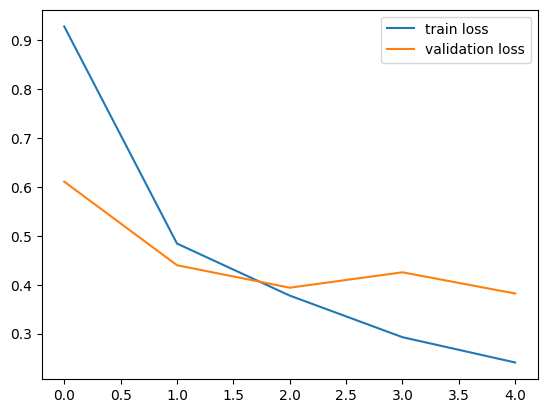

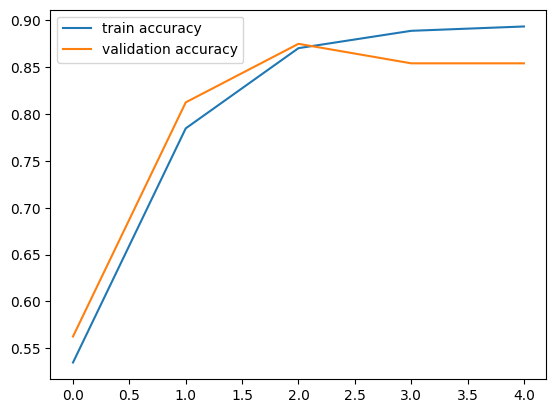

In [32]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [33]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

KeyboardInterrupt: Interrupted by user

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')